# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    print(city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
#print(cities)

hilo
kahului
tuktoyaktuk
cabedelo
airai
rikitea
cape town
kampot
albany
bluff
vitim
nemuro
albany
yellowknife
new norfolk
dikson
dryden
aykhal
atuona
tsihombe
umzimvubu
nikolskoye
lebu
port elizabeth
wajima
burnie
kodiak
ponta do sol
albany
kenai
komsomolskiy
pisco
ushuaia
new norfolk
taolanaro
hilo
gonbad-e qabus
barentsburg
lipari
lebu
kangaatsiaq
hobart
scarborough
san patricio
ostrovnoy
mataura
sentyabrskiy
castro
nizhniy tsasuchey
ushuaia
pevek
mahebourg
hithadhoo
angoche
avarua
jawa
buin
jawhar
hobart
bethel
black river
castro
rikitea
butaritari
ponta do sol
arraial do cabo
qaanaaq
puerto ayora
kang
avarua
busselton
bafra
deputatskiy
andenes
nome
staryy nadym
karaul
srednekolymsk
nikolskoye
taolanaro
taolanaro
artyom
chokurdakh
haines junction
tarko-sale
vieques
sao filipe
esperance
longyearbyen
kodiak
busselton
krasnoselkup
mataura
tasiilaq
karaul
hanover
mildura
qaanaaq
geraldton
ushuaia
nikolskoye
hermanus
cam pha
busselton
bredasdorp
buala
nizhneyansk
port alfred
saint-philip

berlevag
nikolskoye
bagotville
dingle
te anau
bluff
jatiroto
jaisalmer
faya
port hedland
lebu
sentyabrskiy
haines junction
saint-philippe
coahuayana
belushya guba
shingu
barrow
tura
nanortalik
tuktoyaktuk
castro
vicuna
puerto ayora
thompson
atuona
abu jubayhah
henties bay
busselton
klaksvik
norman wells
bluff
busselton
lebu
hilo
qaanaaq
saskylakh
manokwari
saskylakh
rikitea
tsihombe
ponta do sol
paciran
sao filipe
santa maria
lavrentiya
saldanha
illoqqortoormiut
atuona
klaksvik
atuona
mayskiy
barrow
new norfolk
butaritari
cape town
mataura
carnarvon
tiksi
yellowknife
kutum
monduli
new norfolk
illoqqortoormiut
wuwei
presidencia roque saenz pena
kawalu
katangli
hobart
ancud
nikolskoye
provideniya
port alfred
hermanus
rancho palos verdes
adrar
butaritari
kambanis
port lincoln
mataura
norman wells
attawapiskat
kavieng
luganville
bluff
birao
coahuayana
barrow
usta muhammad
qui nhon
jamestown
illoqqortoormiut
quatre cocos
jamestown
kaitangata
salisbury
santa maria
hobart
arraial do cabo
seve

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
params = {"units": "imperial", "appid": api_key}

weather_date = (time.strftime("%m/%d/%y"))

city_number = 0
city_index = 0

cities_pd = pd.DataFrame(columns = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])

print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    try:
        city_number += 1
        city_weather_data = owm.get_current(city, **params)
        cities_pd.loc[city_index, "City"] = city_weather_data["name"]
        cities_pd.loc[city_index, "Cloudiness"] = city_weather_data["clouds"]["all"]
        cities_pd.loc[city_index, "Country"] = city_weather_data["sys"]["country"]
        cities_pd.loc[city_index, "Date"] = city_weather_data["dt"]
        cities_pd.loc[city_index, "Humidity"] = city_weather_data["main"]["humidity"]
        cities_pd.loc[city_index, "Lat"] = city_weather_data["coord"]["lat"]
        cities_pd.loc[city_index, "Lng"] = city_weather_data["coord"]["lon"]
        cities_pd.loc[city_index, "Max Temp"] = city_weather_data["main"]["temp_max"]
        cities_pd.loc[city_index, "Wind Speed"] = city_weather_data["wind"]["speed"]
        city_index += 1
        print(f"Processing Record for {city_number} | {city}")
    except:
        print(f"Record for {city_number} {city} not found.")

Beginning Data Retrieval
------------------------
Processing Record for 1 | hilo
Processing Record for 2 | kahului
Processing Record for 3 | tuktoyaktuk
Processing Record for 4 | cabedelo
Processing Record for 5 | airai
Processing Record for 6 | rikitea
Processing Record for 7 | cape town
Processing Record for 8 | kampot
Processing Record for 9 | albany
Processing Record for 10 | bluff
Processing Record for 11 | vitim
Processing Record for 12 | nemuro
Processing Record for 13 | yellowknife
Processing Record for 14 | new norfolk
Processing Record for 15 | dikson
Processing Record for 16 | dryden
Processing Record for 17 | aykhal
Processing Record for 18 | atuona
Record for 19 tsihombe not found.
Record for 20 umzimvubu not found.
Processing Record for 21 | nikolskoye
Processing Record for 22 | lebu
Processing Record for 23 | port elizabeth
Processing Record for 24 | wajima
Processing Record for 25 | burnie
Processing Record for 26 | kodiak
Processing Record for 27 | ponta do sol
Process

Processing Record for 223 | ohara
Processing Record for 224 | sorata
Processing Record for 225 | tuatapere
Processing Record for 226 | faya
Processing Record for 227 | naze
Processing Record for 228 | braganca paulista
Processing Record for 229 | caravelas
Processing Record for 230 | katsuura
Processing Record for 231 | saldanha
Processing Record for 232 | hovd
Processing Record for 233 | la asuncion
Processing Record for 234 | nyaunglebin
Processing Record for 235 | kaitangata
Processing Record for 236 | lagoa
Processing Record for 237 | cidreira
Processing Record for 238 | veselynove
Processing Record for 239 | naryan-mar
Processing Record for 240 | ulaangom
Processing Record for 241 | banda aceh
Processing Record for 242 | kruisfontein
Processing Record for 243 | salalah
Processing Record for 244 | benghazi
Processing Record for 245 | hailar
Processing Record for 246 | saint george
Processing Record for 247 | bandarbeyla
Processing Record for 248 | hammerfest
Processing Record for 2

Record for 445 malwan not found.
Processing Record for 446 | lasa
Processing Record for 447 | thunder bay
Processing Record for 448 | kumbo
Processing Record for 449 | kholm-zhirkovskiy
Processing Record for 450 | bastia
Record for 451 kashi not found.
Processing Record for 452 | mandali
Processing Record for 453 | jeronimo monteiro
Record for 454 palabuhanratu not found.
Processing Record for 455 | jishou
Processing Record for 456 | simpang
Processing Record for 457 | sambava
Processing Record for 458 | lompoc
Processing Record for 459 | hobyo
Processing Record for 460 | karatsu
Processing Record for 461 | san joaquin
Processing Record for 462 | jiaocheng
Processing Record for 463 | abonnema
Processing Record for 464 | igrim
Processing Record for 465 | mandalgovi
Processing Record for 466 | berlevag
Processing Record for 467 | bagotville
Processing Record for 468 | dingle
Processing Record for 469 | jatiroto
Processing Record for 470 | jaisalmer
Processing Record for 471 | coahuayana


In [13]:

#params = {"units": "imperial", "appid": api_key}
#query_url = f"{base_url}&units={units}&q="
#query_url = base_url + "appid=" + api_key + "&units=" + units
#says api_key not defined when I use this but I have an api_key? how to fix

# index_city = 0
# index_number = 0
# city_name = []
# cloudiness = []
# country = []
# date = []
# humidity = []
# lat = []
# lng = []
# max_temp = []
# wind_speed = []
# for city in cities:
#     index_city += 1
#     try:
#         print("Beginning Data Retrieval")
#         print("------------------------")
# #         while index_city < len(cities):
# #             index_city += 1
# #             #city_weather_data = owm.get_current(city, **params)
# #             #print(json.dumps(city_weather_data, indent = 4, sort_keys = True))
# #             index_number += 1
# #             print(f"Processing Record {index_city} | {cities[index_city]}")
#         city_weather_data = owm.get_current(city, **params)
    
#         #print(json.dumps(city_weather_data, indent = 4, sort_keys = True)) 
#         city_name.append(city_weather_data["name"])
#         cloudiness.append(city_weather_data["clouds"]["all"])
#         country.append(city_weather_data["sys"]["country"])
#         date.append(city_weather_data["dt"])
#         humidity.append(city_weather_data["main"]["humidity"])
#         lat.append(city_weather_data["coord"]["lat"])
#         lng.append(city_weather_data["coord"]["lon"])
#         max_temp.append(city_weather_data["main"]["temp_max"])
#         wind_speed.append(city_weather_data["wind"]["speed"])
#         index_number += 1
#         #print(f"Processing Record {index_city} | {cities[index_city]}
#     except (SyntaxError, HTTPError):
#         print(f"City Not Found for {index_city} | {cities[index_city]} .")
        
# # cities_pd = pd.DataFrame({"City": city_name,"Cloudiness": cloudiness,
# #                           "Country": country, \
# #                           "Date": date,\
# #                           "Humidity": humidity,\ 
# #                           "Lat": lat, \
# #                           "Lng": lng, \
# #                           "Max Temp": max_temp, \
# #                           "Wind Speed": wind_speed})
# print(city_name)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,90,US,1551924749,68,19.71,-155.08,71.6,6.93
1,Kahului,75,US,1551924377,69,20.89,-156.47,75,13.87
2,Tuktoyaktuk,90,CA,1551920400,77,69.44,-133.03,5,4.7
3,Cabedelo,20,BR,1551920400,88,-6.97,-34.84,78.8,2.24
4,Airai,80,TL,1551924775,69,-8.93,125.41,80.68,2.84


City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [5]:

#cities_pd.loc[index, "Cloudiness"] = some json dictionary ["results"][0]["weather"]

cities_pd.to_csv(output_data_file, index = False, header = True)
cities_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,90,US,1551924749,68,19.71,-155.08,71.6,6.93
1,Kahului,75,US,1551924377,69,20.89,-156.47,75,13.87
2,Tuktoyaktuk,90,CA,1551920400,77,69.44,-133.03,5,4.7
3,Cabedelo,20,BR,1551920400,88,-6.97,-34.84,78.8,2.24
4,Airai,80,TL,1551924775,69,-8.93,125.41,80.68,2.84


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [6]:
latitude = cities_pd["Lat"]
max_temp = cities_pd["Max Temp"]
humidity = cities_pd["Humidity"]
cloudiness = cities_pd["Cloudiness"]
wind_speed = cities_pd["Wind Speed"]

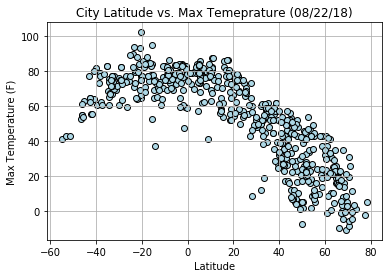

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter(latitude, max_temp, marker = "o", color = "lightblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temeprature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

plt.savefig("../output_data/latitude_vs_temp.png",dpi=160, bbox_inches="tight")

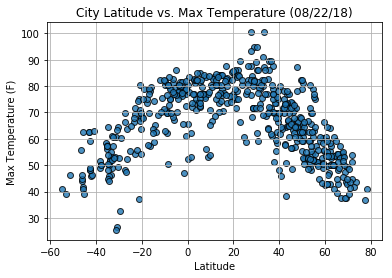

#### Latitude vs. Humidity Plot

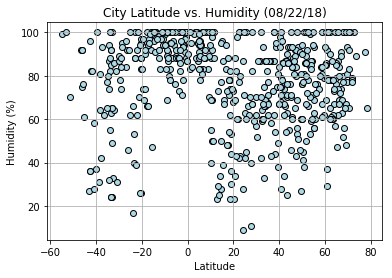

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(latitude, humidity, marker = "o", facecolor = "lightblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

plt.savefig("../output_data/latitude_vs_humidity.png",dpi=160, bbox_inches="tight")

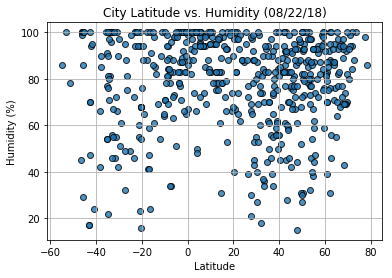

#### Latitude vs. Cloudiness Plot

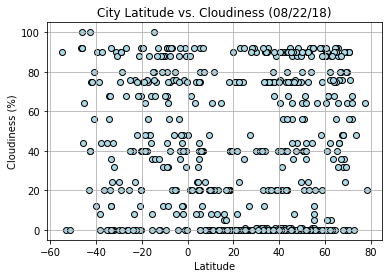

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(latitude, cloudiness, marker = "o", facecolor = "lightblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

plt.savefig("../output_data/latitude_vs_cloudiness.png",dpi=160, bbox_inches="tight")

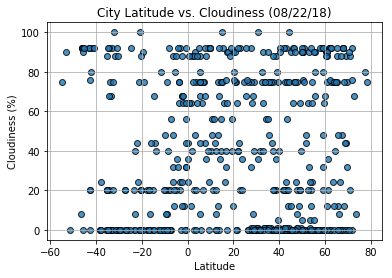

#### Latitude vs. Wind Speed Plot

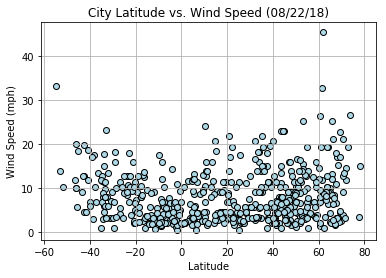

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(latitude, wind_speed, marker = "o", facecolor = "lightblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

plt.savefig("../output_data/latitude_vs_wind_speed.png",dpi=160, bbox_inches="tight")

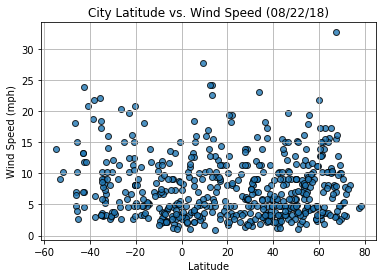